In [1]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hugs.datasets import CatButler
from hugs.datasets.hugged import merge_synth_cats
plt.style.use('jpg')

In [2]:
cb = CatButler(synths=True)
cat_with_nan = cb.combine_patch_cats()
cat = cat_with_nan.dropna()
syn = cb.combine_patch_cats(fn='synths.csv')

In [3]:
good_patches=cat_with_nan.loc[
    ~cat_with_nan[['X_IMAGE', 'Y_IMAGE']].isnull().all(1), ['tract', 'patch']].drop_duplicates()
bad_patches=cat_with_nan.loc[
    cat_with_nan[['X_IMAGE', 'Y_IMAGE']].isnull().all(1), ['tract', 'patch']].drop_duplicates()
syn_good = pd.merge(syn, good_patches, on=['tract', 'patch'])

In [4]:
merged = merge_synth_cats(cat, syn_good)
print(len(merged), (cat['synth_id']>-1).sum())
cut = (np.abs(merged['dmu(i)'])<1) & (merged['synth_offset']<10)
merged = merged[cut]
print(len(merged))

8684 8684
6538


In [5]:
len(syn_good), len(syn)

(17780, 18640)

In [6]:
len(merged)/float(len(syn_good))

0.36771653543307087

count    6538.000000
mean       -0.083532
std         0.226239
min        -2.881084
25%        -0.153211
50%        -0.049254
75%         0.023180
max         1.252469
dtype: float64


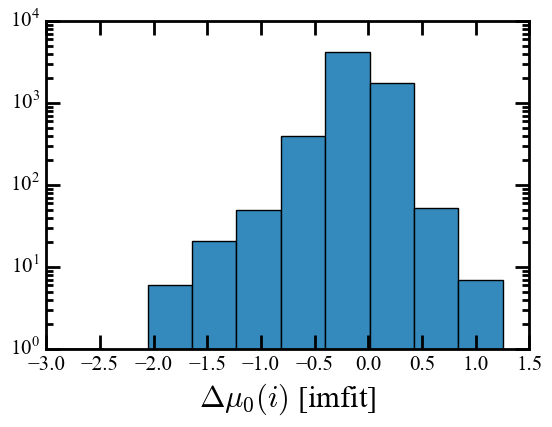

In [7]:
band = 'i'
diff = merged['mu_0('+band+')']-merged['mu_0('+band+')_syn']
plt.hist(diff, log=True)
plt.xlabel(r'$\Delta \mu_0('+band+')$ [imfit]')
print(diff.describe())

count    6538.000000
mean        0.093596
std         0.191954
min        -2.585886
25%         0.015710
50%         0.088029
75%         0.176733
max         1.015470
dtype: float64


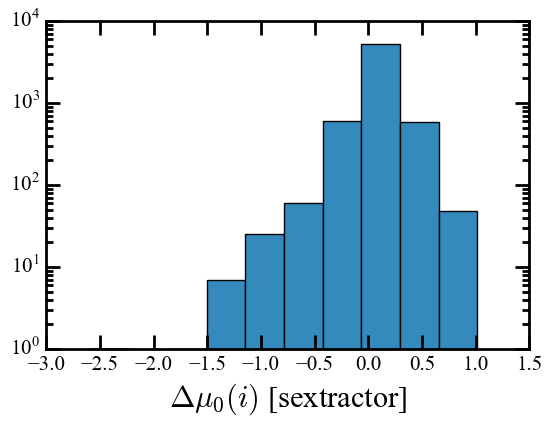

In [8]:
band = 'i'
diff = merged['mu_aper_0('+band+')']-merged['mu_0('+band+')_syn']
plt.hist(diff, log=True)
plt.xlabel(r'$\Delta \mu_0('+band+')$ [sextractor]')
print(diff.describe())

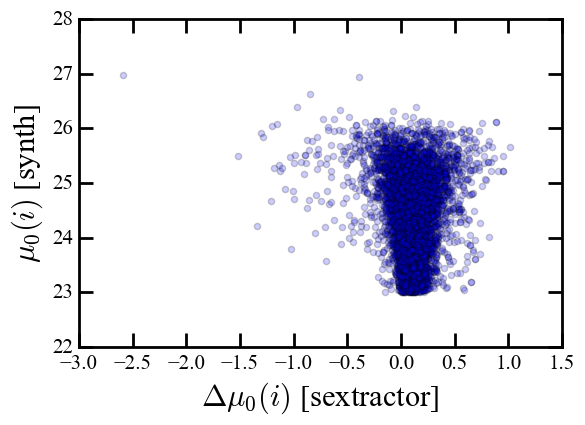

In [9]:
band = 'i'
diff = merged['mu_aper_0('+band+')']-merged['mu_0('+band+')_syn']
plt.scatter(diff, merged['mu_0('+band+')_syn'], alpha=0.2)
plt.xlabel(r'$\Delta \mu_0('+band+')$ [sextractor]')
plt.ylabel(r'$\mu_0('+band+')$ [synth]');

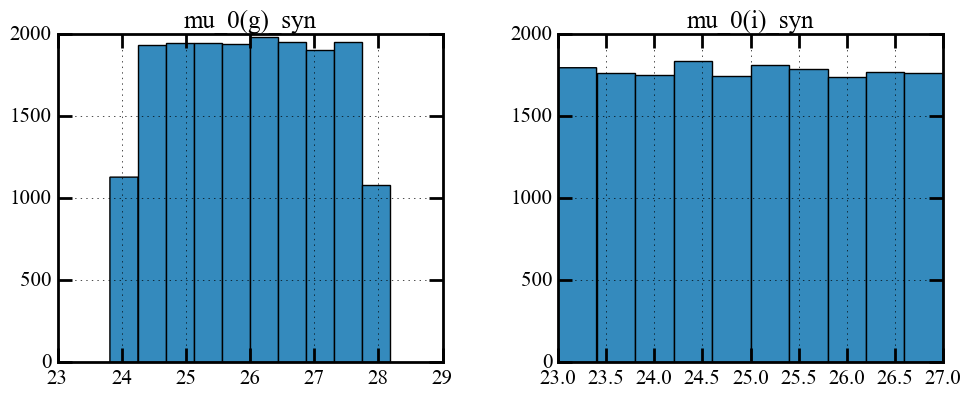

In [10]:
syn_good.hist(['mu_0(i)_syn', 'mu_0(g)_syn'], bins=10, figsize=(11,4));

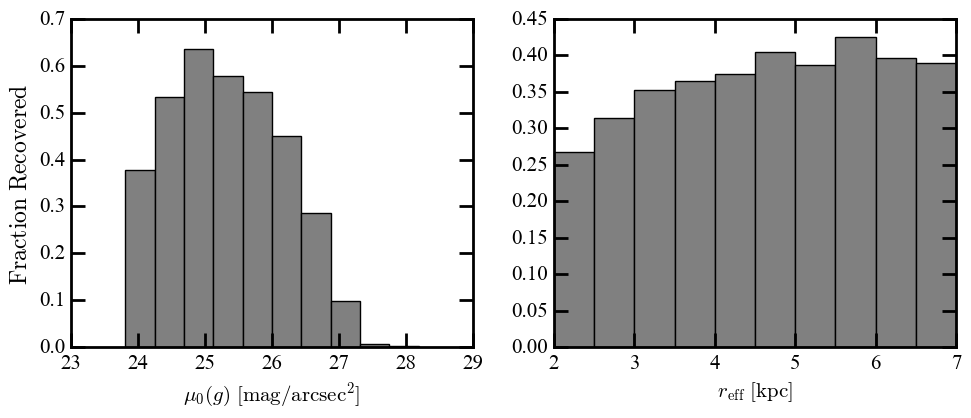

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(11,4))

band = 'g'
total_hist, bins = np.histogram(syn_good['mu_0('+band+')_syn'], bins=10)
found_hist, _ = np.histogram(merged['mu_0('+band+')_syn'], bins=10)
ax[0].bar(bins[:-1], found_hist/total_hist, bins[1]-bins[0], color='gray')
ax[0].set_xlabel(r'$\mu_0('+band+')\ \mathrm{[mag/arcsec^2]}$', fontsize=15)
ax[0].set_ylabel('$\mathrm{Fraction\ Recovered}$', fontsize=17)

total_hist, bins = np.histogram(syn_good['r_e_syn'], bins=10)
found_hist, _ = np.histogram(merged['r_e_syn'], bins=10)
ax[1].bar(bins[:-1], found_hist/total_hist, bins[1]-bins[0], color='gray')
ax[1].set_xlabel('$r\mathrm{_{eff}\ [kpc]}$', fontsize=15);